In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/lijiangmeng/opt/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
path = "Images"
annot = "Airplanes_Annotations"

In [3]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [4]:
train_images=[]
train_labels=[]

In [5]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [6]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [7]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

1 airplane_489.jpg
2 airplane_304.jpg
3 airplane_462.jpg
4 airplane_476.jpg
5 airplane_310.jpg
6 airplane_338.jpg
inside
7 airplane_660.jpg
8 airplane_106.jpg
9 airplane_112.jpg
inside
10 airplane_674.jpg
11 airplane_648.jpg
12 airplane_099.jpg
13 airplane_072.jpg
14 airplane_066.jpg
15 airplane_700.jpg
17 airplane_270.jpg
18 airplane_516.jpg
19 airplane_502.jpg
20 airplane_264.jpg
inside
21 airplane_258.jpg
22 airplane_259.jpg
23 airplane_503.jpg
24 airplane_265.jpg
25 airplane_271.jpg
26 airplane_517.jpg
28 airplane_067.jpg
29 airplane_073.jpg
30 airplane_098.jpg
31 airplane_649.jpg
32 airplane_113.jpg
33 airplane_675.jpg
34 airplane_661.jpg
35 airplane_107.jpg
36 airplane_339.jpg
37 airplane_477.jpg
38 airplane_311.jpg
39 airplane_305.jpg
inside
40 airplane_463.jpg
41 airplane_488.jpg
43 airplane_313.jpg
44 airplane_475.jpg
45 airplane_461.jpg
46 airplane_307.jpg
47 airplane_449.jpg
48 airplane_688.jpg
49 airplane_677.jpg
50 airplane_111.jpg
51 airplane_105.jpg
52 airplane_663.jpg
5

407 airplane_224.jpg
408 airplane_595.jpg
409 airplane_581.jpg
411 airplane_032.jpg
412 airplane_026.jpg
413 airplane_608.jpg
414 airplane_620.jpg
415 airplane_146.jpg
416 airplane_152.jpg
417 airplane_634.jpg
418 airplane_185.jpg
419 airplane_191.jpg
420 airplane_378.jpg
421 airplane_344.jpg
422 airplane_422.jpg
423 airplane_436.jpg
424 airplane_350.jpg
425 airplane_387.jpg
426 airplane_393.jpg
427 airplane_397.jpg
428 airplane_383.jpg
inside
429 airplane_368.jpg
430 airplane_354.jpg
431 airplane_432.jpg
432 airplane_426.jpg
433 airplane_340.jpg
434 airplane_195.jpg
435 airplane_181.jpg
436 airplane_618.jpg
437 airplane_630.jpg
438 airplane_156.jpg
439 airplane_142.jpg
440 airplane_624.jpg
inside
442 airplane_022.jpg
443 airplane_036.jpg
444 airplane_585.jpg
445 airplane_591.jpg
446 airplane_208.jpg
447 airplane_220.jpg
448 airplane_546.jpg
449 airplane_552.jpg
450 airplane_234.jpg
451 airplane_553.jpg
inside
452 airplane_235.jpg
453 airplane_221.jpg
454 airplane_547.jpg
455 airplane_

In [8]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [9]:
X_new.shape

(30229, 224, 224, 3)

In [10]:
y_new.shape

(30229,)

In [11]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19

In [12]:
vggmodel = VGG19(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [14]:
X= vggmodel.layers[-2].output

In [15]:
predictions = Dense(2, activation="softmax")(X)

In [16]:
model_final = keras.Model(inputs = vggmodel.input, outputs = predictions)

In [17]:
from keras.optimizers import adam_v2
opt = keras.optimizers.adam_v2

In [18]:
model_final.compile(loss = keras.losses.categorical_crossentropy, metrics=["accuracy"],optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [20]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [21]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [22]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [23]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [25]:
checkpoint = ModelCheckpoint("ieeercnn_vgg19_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [26]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 15, validation_data= testdata, validation_steps=2, callbacks=[early,checkpoint])

/Users/lijiangmeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 1.2660 - accuracy: 0.7063
Epoch 1: val_loss improved from inf to 0.46469, saving model to ieeercnn_vgg19_1.h5
10/10 [==============================] - 96s 9s/step - loss: 1.2660 - accuracy: 0.7063 - val_loss: 0.4647 - val_accuracy: 0.7812
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 0.5596 - accuracy: 0.6906
Epoch 2: val_loss improved from 0.46469 to 0.30009, saving model to ieeercnn_vgg19_1.h5
10/10 [==============================] - 82s 8s/step - loss: 0.5596 - accuracy: 0.6906 - val_loss: 0.3001 - val_accuracy: 0.8906
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438
Epoch 3: val_loss improved from 0.30009 to 0.27098, saving model to ieeercnn_vgg19_1.h5
10/10 [==============================] - 82s 8s/step - loss: 0.3102 - accuracy: 0.8438 - val_loss: 0.2710 - val_accuracy: 0.8281
Epoch 4/15
10/10 [==============================] - ETA: 0s - loss: 0.3

In [27]:
model_2 = keras.models.load_model("ieeercnn_vgg19_1.h5")

plane


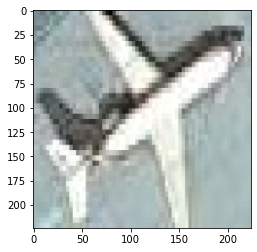

In [28]:
im = X_test[1650]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_2.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

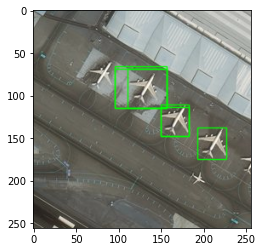

In [35]:
img = cv2.imread(os.path.join(path,"42849.jpg"))
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_2.predict(img)
        if out[0][0] > 0.85:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

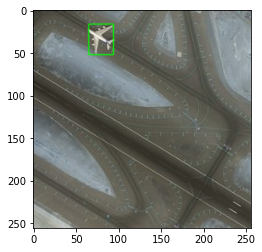

In [33]:
img = cv2.imread(os.path.join(path,"428503.jpg"))
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_2.predict(img)
        if out[0][0] > 0.8:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [36]:
import matplotlib.pyplot as plt

In [37]:
array1 = np.array([1,2,3,4,5,6 ,7,8,9,10])
array2 = np.array([0.3,0.4,0.63,0.87,0.92,0.88,0.92,0.925,0.94,0.96])

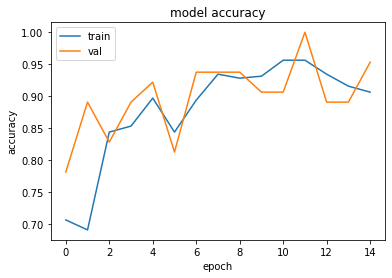

In [45]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
hist.history['accuracy']

[0.706250011920929,
 0.690625011920929,
 0.84375,
 0.8531249761581421,
 0.8968750238418579,
 0.84375,
 0.893750011920929,
 0.934374988079071,
 0.9281250238418579,
 0.9312499761581421,
 0.956250011920929,
 0.956250011920929,
 0.934374988079071,
 0.9156249761581421,
 0.90625]